In [ ]:
import numpy as np #type:ignore
import pandas as pd  #type: ignore
import matplotlib.pyplot as plt  #type: ignore
import seaborn as sns  #type: ignore

In [6]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Plotting based on gender, class and survival rate

In [9]:
'''Pclass, Sex: male | female, Survived'''

'Pclass, Sex: male | female, Survived'

C:\Users\KUSHAL\AppData\Local\Temp\ipykernel_18596\2519869262.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', ci=None)


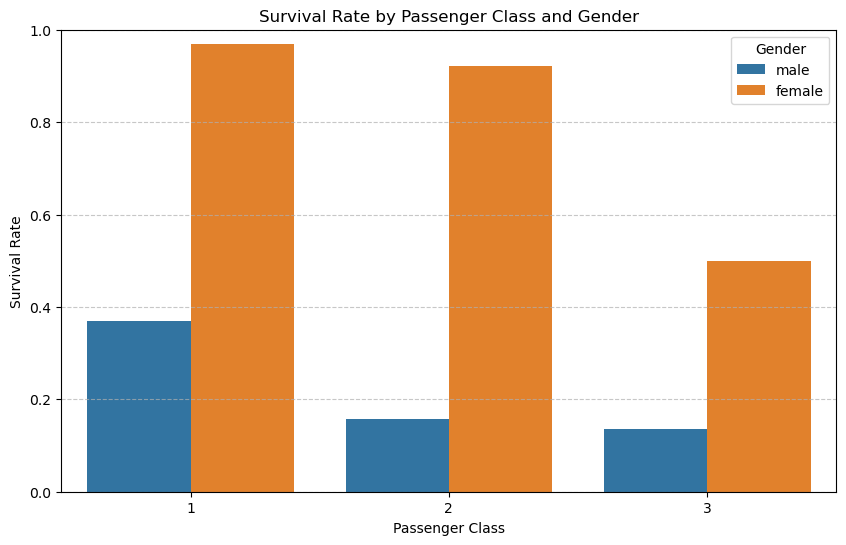

In [15]:

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', ci=None)
plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


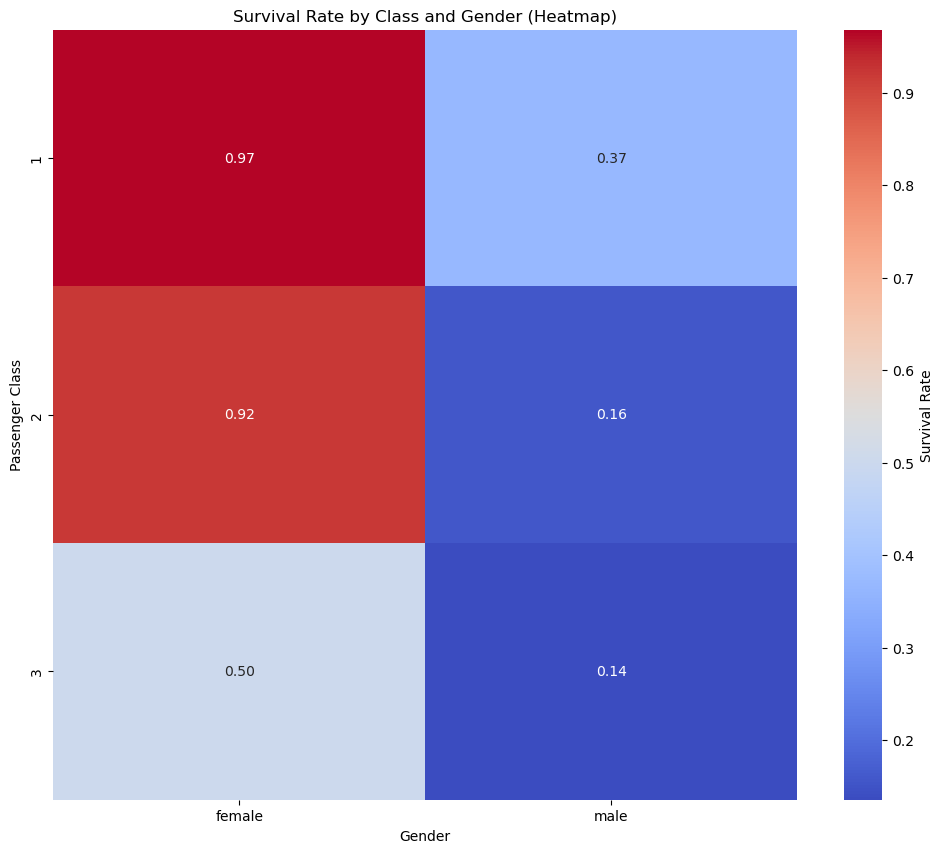

In [20]:
pivot = df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
plt.figure(figsize=(12, 10))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Survival Rate'})
plt.title('Survival Rate by Class and Gender (Heatmap)')
plt.xlabel('Gender')
plt.ylabel('Passenger Class')
plt.show()


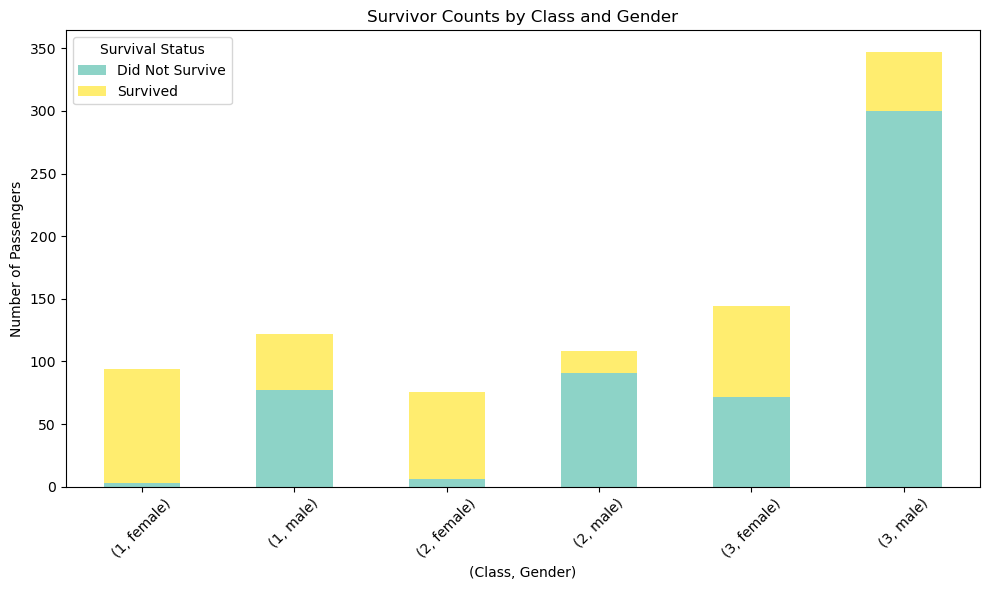

In [21]:
# Optional: Map for readability
df['Survival Status'] = df['Survived'].map({0: 'Did Not Survive', 1: 'Survived'})

# Count survivors per (Pclass, Sex)
grouped = df.groupby(['Pclass', 'Sex', 'Survival Status']).size().unstack(fill_value=0)

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Survivor Counts by Class and Gender')
plt.ylabel('Number of Passengers')
plt.xlabel('(Class, Gender)')
plt.legend(title='Survival Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
